<h1>MNIST DATASET </h1>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import cv2
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from keras.optimizers import SGD

import warnings                      
warnings.simplefilter("ignore")  # ignores the warning

# Load .npy file

In [2]:
# Load the MNIST data from .npy file
data = np.load('data/mnist_data.npy', allow_pickle=True)
images = data.item().get('images')
labels = data.item().get('labels')

# Visualize

In [3]:
import random

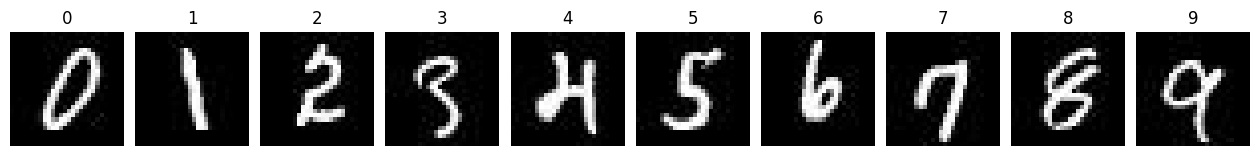

In [4]:
def random_value_for_index(labels, target_value):
    indices = [index for index, value in enumerate(labels) if value == target_value]
    return random.choice(indices)

# Define categories
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(16, 16))

for index, category in enumerate(categories):
    # Select random image index from specific category
    random_index = random_value_for_index(labels, category)
    # Plot the random image
    axs[index].imshow(images[random_index].reshape(28, 28), cmap='gray')
    axs[index].axis('off')
    axs[index].set_title(category)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Train Test Split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size=0.2, random_state=11)

In [6]:
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

In [7]:
print("X_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)


X_train shape :  (33600, 28, 28)
y_train shape :  (33600,)
X_test shape :  (8400, 28, 28)
y_test shape :  (8400,)


# Normalization

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
x_train.shape

(33600, 28, 28)

# Train RNN model

In [10]:
model = Sequential()
model.add(LSTM(128, input_shape=(28,28 )))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 128)               80384     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 98186 (383.54 KB)
Trainable params: 98186 (383.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Early Stoping

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=5)

# Compile

In [12]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train

In [13]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1,callbacks=[early_stop])

Epoch 1/100
945/945 [==============================] - 30s 29ms/step - loss: 2.2898 - accuracy: 0.1684 - val_loss: 2.2722 - val_accuracy: 0.2196
Epoch 2/100
945/945 [==============================] - 30s 32ms/step - loss: 2.2151 - accuracy: 0.2389 - val_loss: 2.0936 - val_accuracy: 0.2717
Epoch 3/100
945/945 [==============================] - 24s 26ms/step - loss: 1.9298 - accuracy: 0.3261 - val_loss: 1.6975 - val_accuracy: 0.4092
Epoch 4/100
945/945 [==============================] - 25s 27ms/step - loss: 1.5644 - accuracy: 0.4358 - val_loss: 1.3072 - val_accuracy: 0.5280
Epoch 5/100
945/945 [==============================] - 27s 28ms/step - loss: 1.2355 - accuracy: 0.5488 - val_loss: 0.9943 - val_accuracy: 0.6372
Epoch 6/100
945/945 [==============================] - 23s 25ms/step - loss: 0.9109 - accuracy: 0.6766 - val_loss: 0.7001 - val_accuracy: 0.7622
Epoch 7/100
945/945 [==============================] - 22s 24ms/step - loss: 0.6910 - accuracy: 0.7742 - val_loss: 0.5492 - val_ac

# Metrics

In [14]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

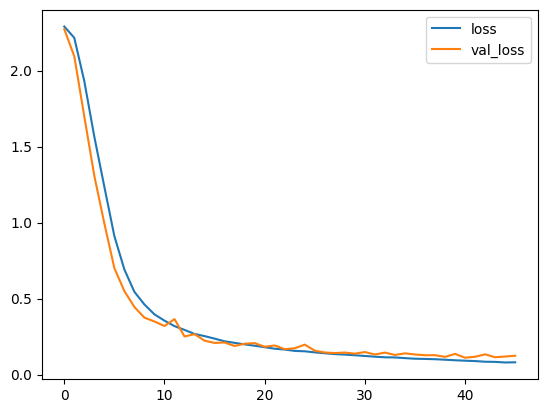

In [15]:
metrics[['loss','val_loss']].plot()

<Axes: >

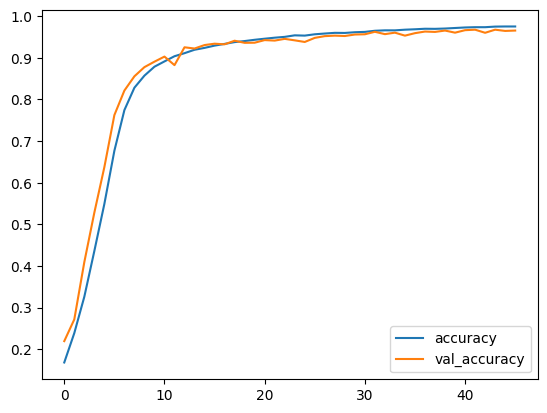

In [16]:
metrics[['accuracy', 'val_accuracy']].plot()

In [17]:
model.save("model/mnist_lstm.h5")

In [18]:
from keras.models import load_model
model= load_model("model/mnist_lstm.h5")

# Predict on Test data

In [36]:
x_test.shape

(8400, 28, 28)

In [19]:
y_pred = model.predict(x_test)

263/263 [==============================] - 4s 12ms/step


In [20]:
y_pred

array([[2.5149661e-06, 9.7959650e-01, 1.4185633e-04, ..., 6.4803928e-04,
        1.8336544e-02, 2.5594799e-04],
       [9.6094598e-05, 1.8004321e-06, 7.2923553e-06, ..., 1.3002453e-04,
        7.5724733e-04, 9.9809247e-01],
       [2.7544636e-05, 1.2725909e-06, 8.4249368e-05, ..., 4.0358996e-09,
        4.0062855e-06, 6.4077579e-09],
       ...,
       [6.7333366e-09, 9.9980491e-01, 6.6652829e-05, ..., 8.9258901e-05,
        3.0026313e-05, 2.0782080e-07],
       [2.7697401e-05, 9.3789522e-06, 1.7853910e-06, ..., 7.2304747e-06,
        1.5135086e-04, 9.0619025e-05],
       [9.9542338e-01, 5.5478938e-07, 1.0336988e-03, ..., 5.4370765e-05,
        4.5258919e-04, 2.0347002e-03]], dtype=float32)

In [21]:
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 9, 6, ..., 1, 5, 0], dtype=int64)

<h2>Model Evaluation</h2>

In [23]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [24]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test,average="macro"))
print("Precision-Score :",precision_score(y_pred,y_test,average="macro"))
print("F1-Score :",f1_score(y_pred,y_test,average="macro"))

Model's acuracy : 0.963452380952381
Recall-Score : 0.9629738774222026
Precision-Score : 0.9633347340757252
F1-Score : 0.9629718282559893


In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       842
           1       0.98      0.99      0.98       914
           2       0.97      0.97      0.97       858
           3       0.96      0.96      0.96       871
           4       0.94      0.98      0.96       790
           5       0.97      0.96      0.97       777
           6       0.99      0.95      0.97       841
           7       0.96      0.98      0.97       889
           8       0.97      0.92      0.94       824
           9       0.93      0.94      0.93       794

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



# Confusion Matrix

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

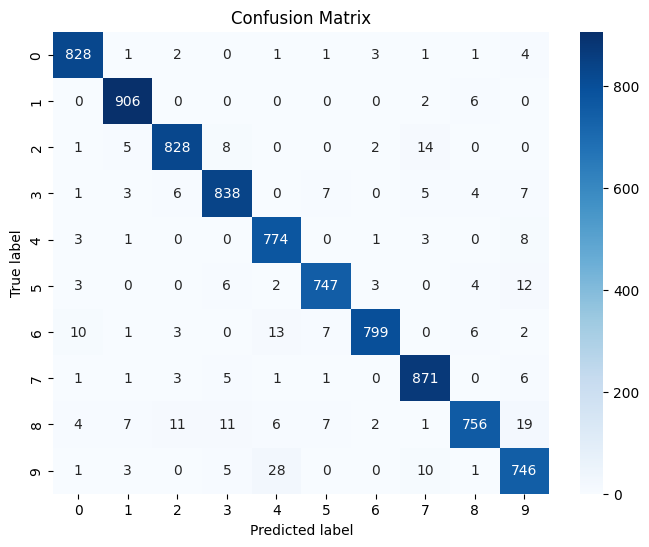

In [27]:
# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Predict

In [62]:
def classify_image(image):
    plt.imshow(cv2.resize(image,(28,28)),cmap='gray')
    print(image.shape)
    image = np.expand_dims(image, axis=0)
    print(image.shape)
    # Perform prediction
    prediction = np.argmax(model.predict(image))
    
    return prediction

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 42ms/step


1

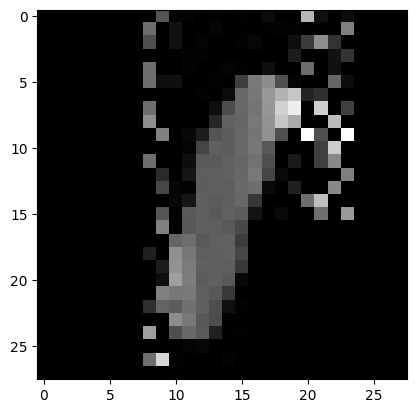

In [63]:
classify_image(x_test[0])

# Custom

In [68]:
def classify_image_custom(image):
    image = cv2.resize(image, (28, 28))
    print(image.shape)
    plt.imshow(image,cmap='gray')
    image = tf.keras.utils.normalize(image, axis=1)
    # plt.imshow(image,cmap='gray')
    plt.show()
    image = np.expand_dims(image, axis=0)
    # Perform prediction
    prediction = np.argmax(model.predict(image))
    
    return prediction

(28, 28)


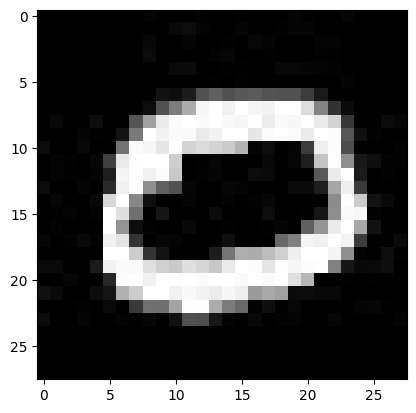

1/1 [==============================] - 0s 33ms/step


0

In [69]:
img = cv2.imread('data/test/img_2.jpg', cv2.IMREAD_GRAYSCALE)
classify_image_custom(img)